## Biodiversity in National Parks

This project uses two datasets to evaluate biodiversity and endangerment statuses in four national parks:  
Yosemite National Park  
Bryce National Park  
Great Smoky Mountains National Park  
Yellowstone National Park    
  
Both datasets reportedly came from the National Park Service. The observations.csv dataset, which contains observation counts for various species within the four parks, spans a length of seven days. However, the exact timeframe of those seven days is not known.  
  
The purpose of this project is to show proficiency in exploratory data analysis.

### Project Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in dataframes to be used in project.
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### Dataset Processing

In [3]:
# Records with duplicate scientific names in the species dataframe are dropped, followed by a left join on the observatons
# dataframe and the species dataframe.
species = species.drop_duplicates(subset='scientific_name')
all_data = observations.join(species.set_index('scientific_name'), on='scientific_name', how='left')

In [4]:
# First ten records of the combined dataframe, all_data.
all_data.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,Virginia Wildrye,NaN
6,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,"Big Squirreltail, Big Wild Rye",NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,Whorled Loosestrife,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,NaN


In [5]:
# The scientific name column is dropped, along with any remaining duplicate records. 
all_data.drop(columns='scientific_name', inplace=True)
all_data = all_data.drop_duplicates()

In [6]:
# Rename and reorder dataframe columns.
all_data.rename(columns={'common_names': 'common_name'}, inplace=True)
all_data = all_data[['common_name', 'category', 'park_name', 'observations', 'conservation_status']]

### Exploratory Data Analysis

In [7]:
# First five records of optimized dataframe, all_data.
all_data.head()

,common_name,category,park_name,observations,conservation_status
0,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,NaN
1,American Mink,Mammal,Great Smoky Mountains National Park,77,NaN
2,Klamath Plum,Vascular Plant,Yosemite National Park,138,NaN
3,Velvetleaf,Vascular Plant,Bryce National Park,84,NaN
4,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,NaN


In [8]:
# all_data column info and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 23295
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   common_name          23248 non-null  object
 1   category             23248 non-null  object
 2   park_name            23248 non-null  object
 3   observations         23248 non-null  int64 
 4   conservation_status  760 non-null    object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [9]:
# Summary statistics for all_data.
all_data.describe(include='all')

,common_name,category,park_name,observations,conservation_status
count,23248,23248,23248,23248.000000,760
unique,5229,7,4,NaN,4
top,Dicranum Moss,Vascular Plant,Yosemite National Park,NaN,Species of Concern
freq,28,17848,5815,NaN,644
mean,NaN,NaN,NaN,142.285702,NaN
std,NaN,NaN,NaN,69.885462,NaN
min,NaN,NaN,NaN,9.000000,NaN
25%,NaN,NaN,NaN,86.000000,NaN
50%,NaN,NaN,NaN,124.000000,NaN
75%,NaN,NaN,NaN,195.000000,NaN


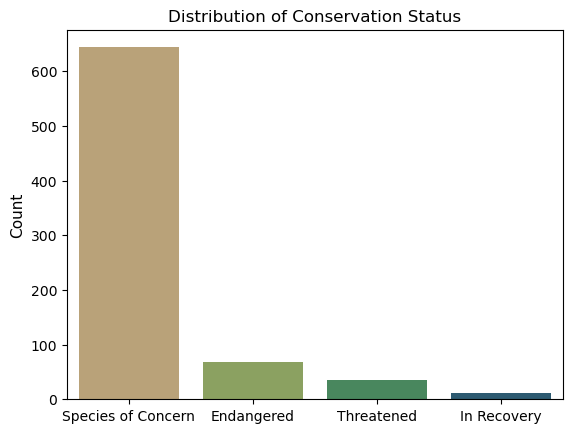

In [10]:
# Distribution of categories of the conservation_status column. Most values in the conservation_status column are missing
# (760 non-missing values), indicating most records in the dataset have no current concern for endangerment.
sns.countplot(data=all_data, x='conservation_status', palette='gist_earth_r')
plt.title('Distribution of Conservation Status')
plt.xlabel('')
plt.ylabel('Count', fontsize=11)
plt.show()

From our 760 records that are categorized into an endangerment status, the vast majority of those records are categorized as a "Species of Concern". Approximately 70 records are classified as "Endangered" (the most alarming category), and approximately 40 are classified as "Threatened" (meaning there is concern for future endangerment).

In [11]:
# Create a subset of all records with a concervation_status of Endangered or Threatened. This subset will be used for the
# remainder of the analysis.
endangered = all_data[(all_data['conservation_status'] == 'Endangered') | (all_data['conservation_status'] == 'Threatened')]
endangered.shape

(104, 5)

104 different species have been given a conservation status of endangered or threatened.

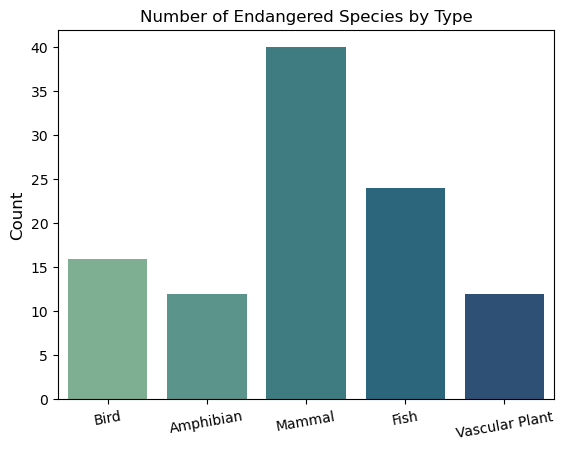

In [12]:
# Distribution of endangered species by type of species. 
sns.countplot(data=endangered, x='category', palette='crest')
plt.title('Number of Endangered Species by Type')
plt.xlabel('')
plt.xticks(rotation=10)
plt.ylabel('Count', fontsize=12)
plt.show()

From the distribution above, we can see that mammals constitute the majority of records with a conservation status of endangered or threatened. Amphibians have the least amount of endangered species, with only 12 being classified as threatened or endangered across all four national parks.

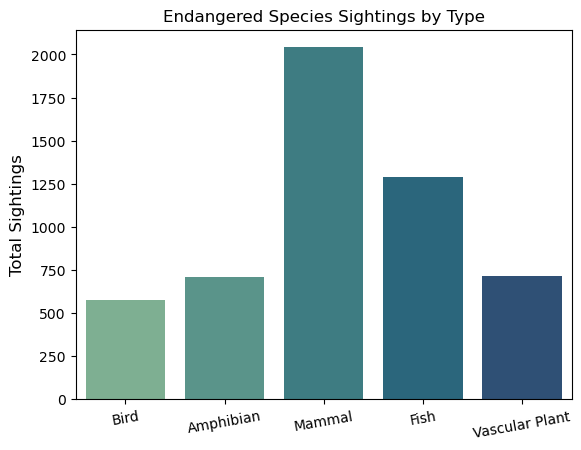

In [13]:
# Recorded sightings of endangered species by type of species. 
sns.barplot(data=endangered, x='category', y='observations', estimator=sum, ci=None, palette='crest')
plt.title('Endangered Species Sightings by Type')
plt.xlabel('')
plt.xticks(rotation=10)
plt.ylabel('Total Sightings', fontsize=12)
plt.show()

In the above plot, we can see that the distribution of recorded sightings for endangered species is nearly identical to the distribution of the count of endangered species (previous plot).

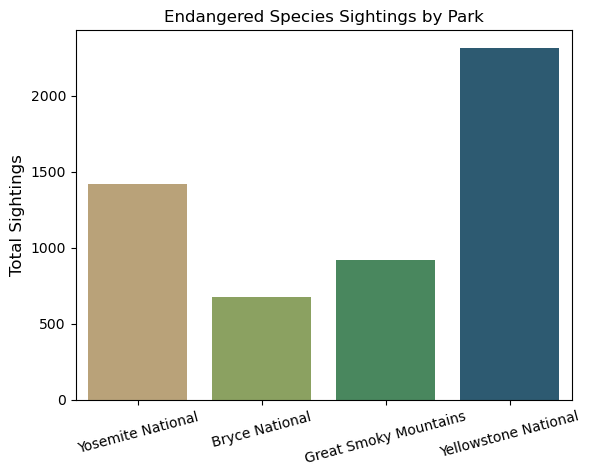

In [14]:
# Recorded sightings of endangered species by national park. 
sns.barplot(data=endangered, x='park_name', y='observations', estimator=sum, ci=None, palette='gist_earth_r')
plt.title('Endangered Species Sightings by Park')
plt.xlabel('')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Yosemite National', 'Bryce National', 'Great Smoky Mountains', 'Yellowstone National'], rotation=15)
plt.ylabel('Total Sightings', fontsize=12)
plt.show()

In the plot above, we see that of the four national parks included in this study, Yellowstone National Park has the most recorded total sightings of species that have been classified as endangered or threatened. Bryce National Park has the least amount of recorded sightings. This distribtution could be due to a number of factors, such as park size and the density of wildlife contained within. However, addressing questions related to these factors is outside the scope of this project, as the information needed is not contained within either of the original datasets.

### Conclusions

There are 760 different species that have been given a conservation status within the four national parks in this study. The majority of these are in the category "Species of Concern", which is not as alarming as the categories "Threatened" or "Endangered".  
However, 104 of them have been classified as endangered or threatened. The majority of these are mammals, and the majority of endangered species sightings occured within Yellowstone National Park. This could be because Yellowstone National Park has a greater density of wildife than the other parks; however, further research would need to be done in order to verify this assumption. 